/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_79438/550115137.py:8: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv(file_name, index_col=False)


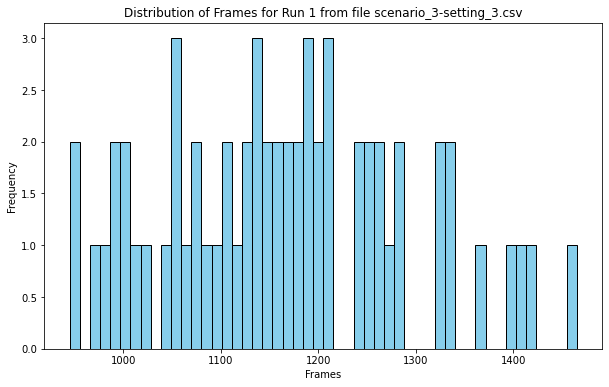

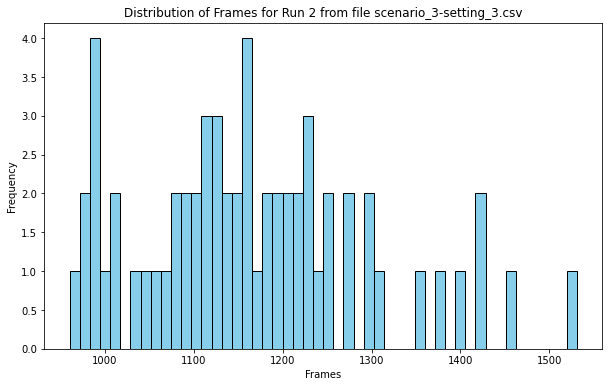

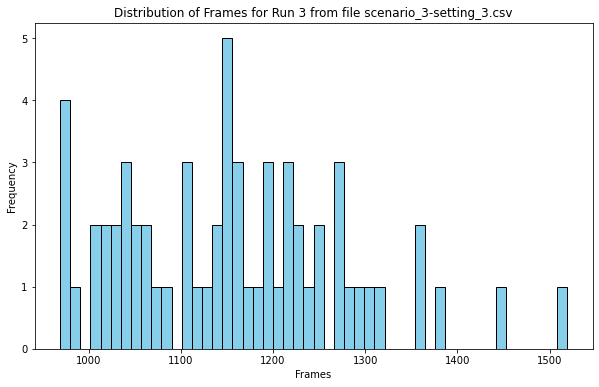

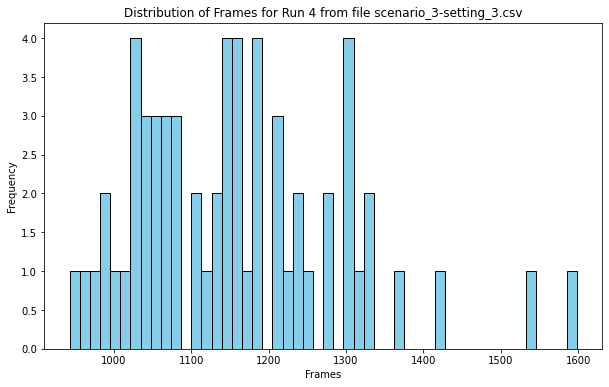

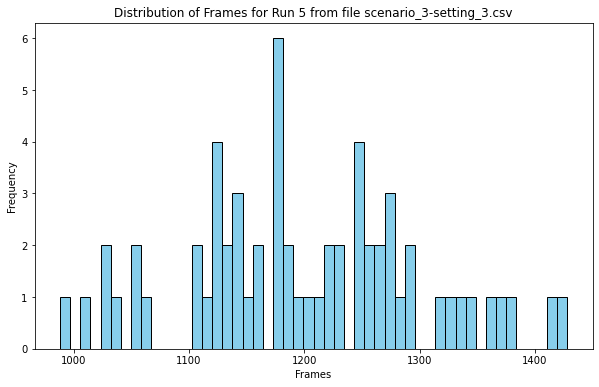

/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_79438/550115137.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)
/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_79438/550115137.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)
/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_79438/550115137.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_d

/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_79438/550115137.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)
/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_79438/550115137.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)
/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_79438/550115137.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_d

/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_79438/550115137.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)
/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_79438/550115137.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)
/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_79438/550115137.py:80: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_d

         Run  Mean Frames  Std Frames Min Frames Max Frames
0        1.0  1165.491803  125.124554      945.0     1465.0
1        2.0  1167.032787  130.940568      960.0     1531.0
2        3.0  1158.114754  122.980906      969.0     1519.0
3        4.0  1158.786885  134.670847      943.0     1598.0
4        5.0  1199.754098  102.262677      988.0     1428.0
..       ...          ...         ...        ...        ...
96      97.0  1203.967213   130.29172      940.0     1446.0
97      98.0  1173.114754  139.258165      923.0     1588.0
98      99.0  1179.327869  134.689114      928.0     1484.0
99     100.0  1174.327869  113.952727      975.0     1439.0
100  Average  1174.445902  121.744369     933.41    1491.68

[101 rows x 5 columns]


/var/folders/n7/lp_pz4m94lg1q8nq7q_jmnwr0000gn/T/ipykernel_79438/550115137.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_df = summary_df.append(average_all_runs, ignore_index=True)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Read the CSV file
file_name = "scenario_3-setting_3.csv"
df = pd.read_csv(file_name, index_col=False)

# Remove mentioned columns
df = df.drop(['Cell kind', 'Coordinates'], axis=1)

# Create new columns based on 'Event' column
df['exit'] = df.loc[df['Event'] == 'exit', 'Frame'].astype(float)
df['entry'] = df.loc[df['Event'] == 'entry', 'Frame'].astype(float)

# Remove 'Event' and 'Frame' columns
df = df.drop(['Event', 'Frame'], axis=1)

# Add a 'Run' column
df['Run'] = np.nan

# Go through the rows and increment run number each time column names are encountered
run = 1
for i, row in df.iterrows():
    if row[0] == 'ID':  # if the first value of the row is 'ID', this is the start of a new run
        run += 1
    else:
        df.at[i, 'Run'] = run

# Remove the rows with column names
df = df[df['ID'] != 'ID']

# Split DataFrame into separate DataFrames per unique Run
dfs = [x for _, x in df.groupby('Run')]

# For each DataFrame, group the rows based on ID and combine the values of 'exit' and 'entry'
for i in range(len(dfs)):
    dfs[i] = dfs[i].groupby(['ID'], as_index=False).first()

# Combine the DataFrames again
df = pd.concat(dfs)

# Remove the rows that don't have an 'exit' value
df = df.dropna(subset=['exit'])

# For each unique Run, remove the rows with the first 20 unique IDs
for run in df['Run'].unique():
    ids_to_remove = df[df['Run'] == run]['ID'].unique()[:20]
    df = df[~((df['Run'] == run) & (df['ID'].isin(ids_to_remove)))]

# Calculate the difference between 'exit' and 'entry' columns
df['Frames'] = df['exit'].astype(float) - df['entry'].astype(float)

# Change datatype of 'Run' column to integer
df['Run'] = df['Run'].astype(int)

# Identify unique runs
runs = df['Run'].unique()

# Make plot for each unique run
for run in runs[:5]:  # Modify to visualize more or fewer runs
    df_run = df[df['Run'] == run]
    plt.figure(figsize=(10,6))
    plt.hist(df_run['Frames'], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Frames for Run {run} from file {os.path.basename(file_name)}')
    plt.xlabel('Frames')
    plt.ylabel('Frequency')
    plt.show()

summary_df = pd.DataFrame(columns=['Run', 'Mean Frames', 'Std Frames', 'Min Frames', 'Max Frames'])

# For each unique run, calculate and store the mean, standard deviation, minimum, and maximum of the 'Frames'
for run in df['Run'].unique():
    df_run = df[df['Run'] == run]
    mean_frames = df_run['Frames'].mean()
    std_frames = df_run['Frames'].std()
    min_frames = df_run['Frames'].min()
    max_frames = df_run['Frames'].max()
    summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)

# Calculate the average of the columns over all runs
average_all_runs = summary_df.mean()
average_all_runs['Run'] = 'Average'

# Add the average values to the end of the DataFrame
summary_df = summary_df.append(average_all_runs, ignore_index=True)

# Print the overview
print(summary_df)

# Prepare output file names
base_name = os.path.splitext(os.path.basename(file_name))[0]  # gets filename without extension
processed_data_file_name = f'{base_name}_processed_data.csv'
summary_data_file_name = f'{base_name}_summary_data.csv'

# Save the df DataFrame as a CSV file
df.to_csv(processed_data_file_name, index=False)

# Save the summary_df DataFrame as a CSV file
summary_df.to_csv(summary_data_file_name, index=False)


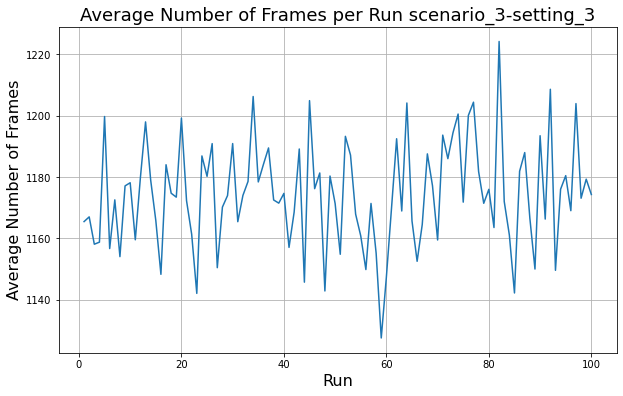

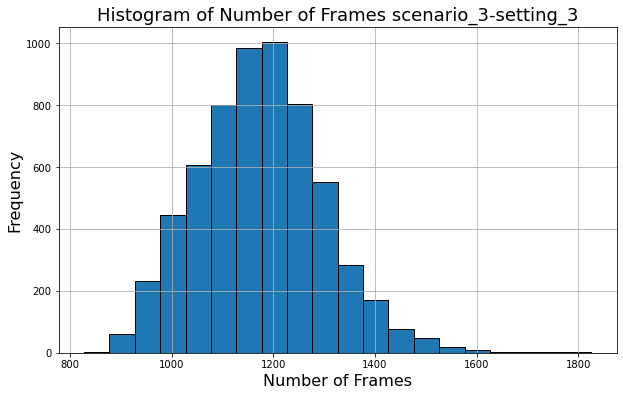

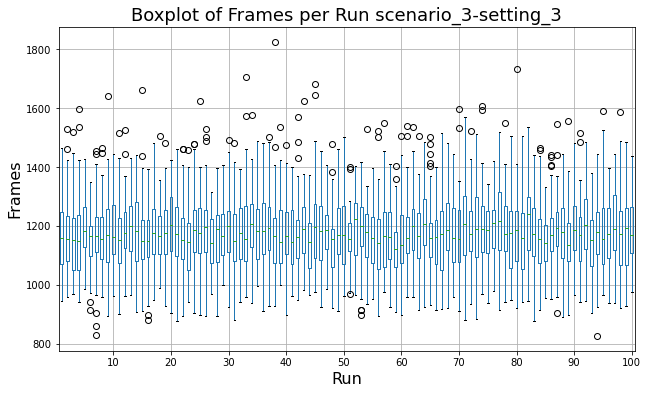

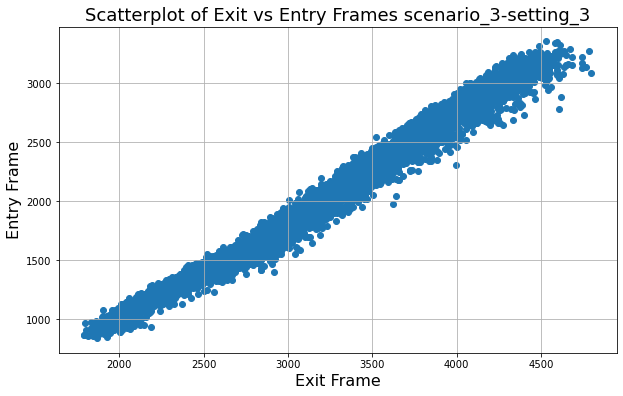

In [3]:
import matplotlib.pyplot as plt
import re
import numpy as np

def clean_title(title):
    return re.sub(r'\W+', '_', title)

# Read the CSV file
file_name = "scenario_3-setting_3.csv"

# Set the font sizes for the title, x-axis label, and y-axis label
title_font_size = 18
axis_font_size = 16

# Generate a plot for the average number of frames per run
plt.figure(figsize=(10,6))
plt.plot(summary_df['Run'][:-1], summary_df['Mean Frames'][:-1])  # exclude the last average
plt.xlabel('Run', fontsize=axis_font_size)
plt.ylabel('Average Number of Frames', fontsize=axis_font_size)
title1 = f'Average Number of Frames per Run {os.path.splitext(os.path.basename(file_name))[0]}'
plt.title(title1, fontsize=title_font_size)
plt.grid(True)
plt.savefig(f"{clean_title(title1)}.png")
plt.show()

# Generate a histogram of the average frames
plt.figure(figsize=(10,6))
plt.hist(df['Frames'], bins=20, edgecolor='black')
plt.xlabel('Number of Frames', fontsize=axis_font_size)
plt.ylabel('Frequency', fontsize=axis_font_size)
title2 = f'Histogram of Number of Frames {os.path.splitext(os.path.basename(file_name))[0]}'
plt.title(title2, fontsize=title_font_size)
plt.grid(True)
plt.savefig(f"{clean_title(title2)}.png")
plt.show()

# Boxplot of Frames per Run
fig, ax = plt.subplots(figsize=(10,6))
df.boxplot(column='Frames', by='Run', ax=ax)
title3 = f'Boxplot of Frames per Run {os.path.splitext(os.path.basename(file_name))[0]}'
plt.title(title3, fontsize=title_font_size)
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by Run' title

# Handle the busy x-axis
ticks = ax.get_xticks()
n = len(ticks) // 10  # Show every 10th label for readability
ax.xaxis.set_major_locator(plt.MaxNLocator(nbins=n))

# Set larger font size for x and y axis labels
ax.set_xlabel('Run', fontsize=axis_font_size)
ax.set_ylabel('Frames', fontsize=axis_font_size)  # Add y-axis label

plt.savefig(f"{clean_title(title3)}.png")
plt.show()

# Scatterplot of 'exit' and 'entry'
plt.figure(figsize=(10,6))
plt.scatter(df['exit'], df['entry'])
plt.xlabel('Exit Frame', fontsize=axis_font_size)
plt.ylabel('Entry Frame', fontsize=axis_font_size)
title4 = f'Scatterplot of Exit vs Entry Frames {os.path.splitext(os.path.basename(file_name))[0]}'
plt.title(title4, fontsize=title_font_size)
plt.grid(True)
plt.savefig(f"{clean_title(title4)}.png")
plt.show()
